In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
from importlib import reload
from utils import *
import test
import acd

C:\Users\Alekseyl\Envs\absa\lib\site-packages\gensim\utils.py:855: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
from jupyterthemes import jtplot
# jtplot.style()  # development
jtplot.reset()  # production

In [3]:
w2v = load_w2v()

Loading real w2v...
Done


Loading tokenizer...
-- ACD:
Loading dataset...
Training...
Evaluating...
   Step        F1
0  0.01  0.389733
1  0.06  0.652554
2  0.11  0.745524
3  0.16  0.791299
4  0.21  0.799757
5  0.26  0.806533
6  0.31  0.810356
7  0.36  0.813784
8  0.41  0.813097
9  0.46  0.817803


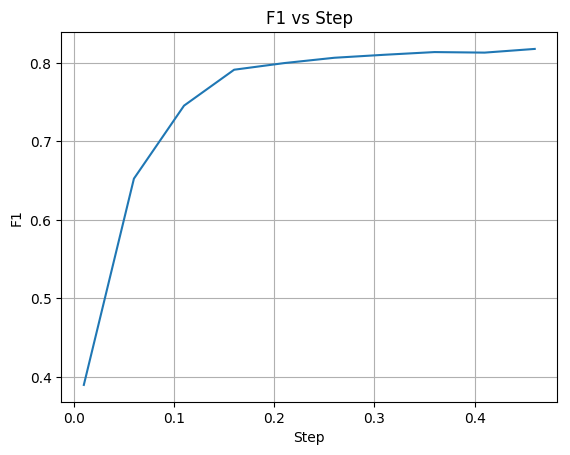

F1: 0.8178025034770515


In [4]:
reload(acd)
acd_ = acd.ACD(w2v)
acd_.train_acd()

In [5]:
import polarity
reload(polarity)
pd_ = polarity.PD(w2v, acd_)
# datasets = pd_.load_grid_datasets()

Using TensorFlow backend.


In [6]:
import polarity
reload(polarity)
pd_ = polarity.PD(w2v, acd_)
# pd_.grid_search_pd(datasets, n_jobs=6)

In [7]:
import polarity
reload(polarity)
pd_ = polarity.PD(w2v, acd_)
# pd_.grid_search_pd_keras()

In [5]:
import polarity
reload(polarity)
pd_ = polarity.PD(w2v, acd_)
data = pd_.prepare_data(pd_.get_pd_features_map_tree_distance, False)

Using TensorFlow backend.


-- PD:
Loading tokenizer...
Loading stemmer...
Loading parser...
Loading datasets...
Core NLP Parser preprocessing result pickled
get_pd_ds progress: 0/1708
get_pd_ds progress: 100/1708
get_pd_ds progress: 200/1708
get_pd_ds progress: 300/1708
get_pd_ds progress: 400/1708
get_pd_ds progress: 500/1708
get_pd_ds progress: 600/1708
get_pd_ds progress: 700/1708
get_pd_ds progress: 800/1708
get_pd_ds progress: 900/1708
get_pd_ds progress: 1000/1708
get_pd_ds progress: 1100/1708
get_pd_ds progress: 1200/1708
get_pd_ds progress: 1300/1708
get_pd_ds progress: 1400/1708
get_pd_ds progress: 1500/1708
get_pd_ds progress: 1600/1708
get_pd_ds progress: 1700/1708
Core NLP Parser preprocessing result pickled
get_pd_ds progress: 0/587
get_pd_ds progress: 100/587
get_pd_ds progress: 200/587
get_pd_ds progress: 300/587
get_pd_ds progress: 400/587
get_pd_ds progress: 500/587


-- PD:
Loading tokenizer...
Loading stemmer...
Loading parser...
Loading datasets...
Core NLP Parser preprocessing result pickled
get_pd_ds progress: 0/1708
get_pd_ds progress: 100/1708
get_pd_ds progress: 200/1708
get_pd_ds progress: 300/1708
get_pd_ds progress: 400/1708
get_pd_ds progress: 500/1708
get_pd_ds progress: 600/1708
get_pd_ds progress: 700/1708
get_pd_ds progress: 800/1708
get_pd_ds progress: 900/1708
get_pd_ds progress: 1000/1708
get_pd_ds progress: 1100/1708
get_pd_ds progress: 1200/1708
get_pd_ds progress: 1300/1708
get_pd_ds progress: 1400/1708
get_pd_ds progress: 1500/1708
get_pd_ds progress: 1600/1708
get_pd_ds progress: 1700/1708
Core NLP Parser preprocessing result pickled
get_pd_ds progress: 0/587
get_pd_ds progress: 100/587
get_pd_ds progress: 200/587
get_pd_ds progress: 300/587
get_pd_ds progress: 400/587
get_pd_ds progress: 500/587
____________________________________________________________________________________________________
Layer (type)                  

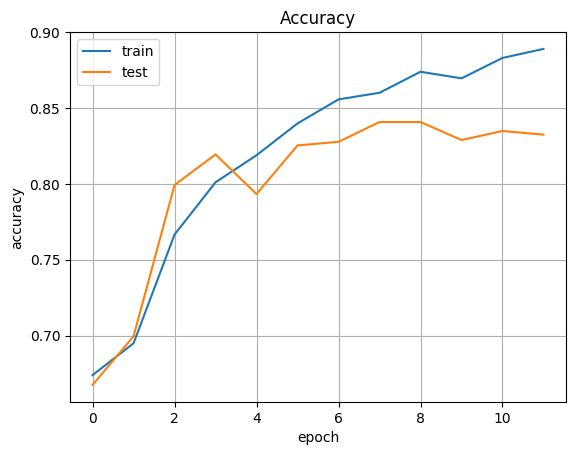

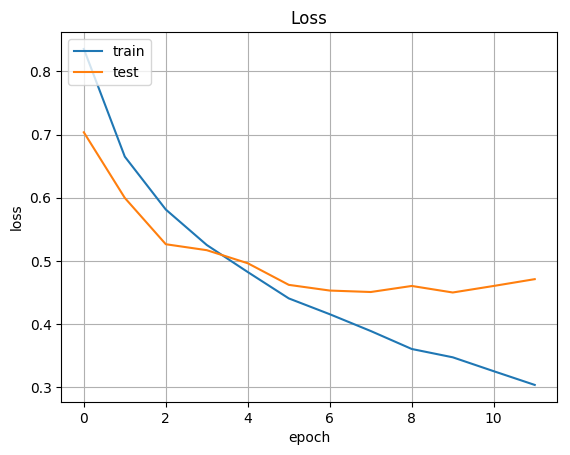

Max val_acc: 0.840855103207314 (epoch: 8)
Scores: [0.84085510320731405, 0.87173396674584325]
    Mult     Score
0    0.5  0.845606
1    0.6  0.849169
2    0.7  0.855107
3    0.8  0.857482
4    0.9  0.861045
5    1.0  0.866983
6    1.1  0.871734
7    1.2  0.871734
8    1.3  0.874109
9    1.4  0.875297
10   1.5  0.874109
11   1.6  0.874109
12   1.7  0.875297
13   1.8  0.875297
14   1.9  0.877672
15   2.0  0.876485
16   2.1  0.877672
17   2.2  0.876485
18   2.3  0.877672
19   2.4  0.878860
20   2.5  0.878860
21   2.6  0.878860
22   2.7  0.877672
23   2.8  0.876485
24   2.9  0.877672
25   3.0  0.877672
26   3.1  0.878860
27   3.2  0.878860
28   3.3  0.877672
29   3.4  0.877672
30   3.5  0.877672
31   3.6  0.877672
32   3.7  0.876485
33   3.8  0.876485
34   3.9  0.876485
35   4.0  0.876485
36   4.1  0.876485
37   4.2  0.876485
38   4.3  0.876485
39   4.4  0.876485
40   4.5  0.875297
41   4.6  0.875297
42   4.7  0.875297
43   4.8  0.875297
44   4.9  0.875297
max_score_mult: 2.399999999999999

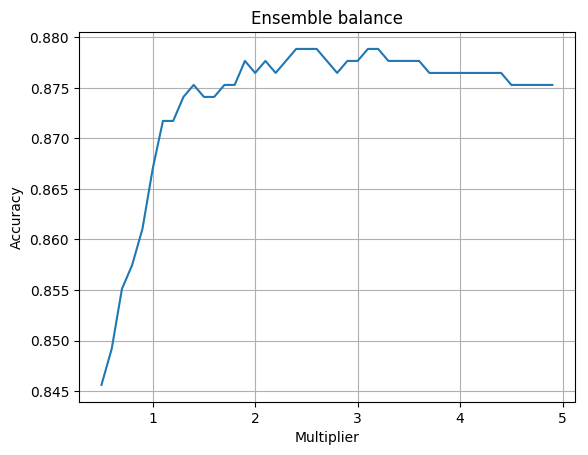

0.87885985748218531

In [10]:
import polarity
reload(polarity)
pd_ = polarity.PD(w2v, acd_)
pd_.train_pd_keras_both_svm(data=data)